# **5. PCA**

## **5.1. Feature Reduction**

Feature reduction (or **dimensionality reduction**) is a key concept in machine learning and data preprocessing. It’s all about simplifying the data by reducing the number of input variables (features), while retaining as much relevant information as possible. This is especially useful when dealing with high-dimensional datasets.

- **Reduces Overfitting:** Fewer features can mean less chance of the model learning noise.
- **Improves Performance:** Less data can lead to faster training and inference.
- **Easier to Visualize:** Reducing to 2D or 3D can help visualize complex datasets.
- **Less Storage/Computation:** Especially important for edge/embedded devices or large datasets.

#### **1. Feature Selection** (subset of original features)
- **Filter Methods**: Use statistical tests like correlation, chi-squared, ANOVA F-test.
- **Wrapper Methods**: Use a predictive model to evaluate combinations of features (e.g., recursive feature elimination).
- **Embedded Methods**: Feature selection occurs during model training (e.g., Lasso regression).

#### **2. Feature Extraction** (create new features)
- **Principal Component Analysis (PCA)**: Transforms data into a new set of axes (principal components) that capture the most variance.
- **Linear Discriminant Analysis (LDA)**: Like PCA, but also considers class labels — good for supervised problems.
- **t-SNE / UMAP**: Nonlinear methods used for visualization and capturing local/global structure.

### **Usage**

- Your model suffers from the **curse of dimensionality**.
- You have **many irrelevant or redundant features**.
- You want to **compress or simplify** the data (e.g., image compression).
- You're preparing data for **visualization**.


## **5.2. PCA Algorithm**

- 1.1. Data Standartization
- 1.2. Compute the Covariance Matrix
- 1.3. Compute Eigenvalues and Eigenvectors
- 1.4. Pick Top k Eigenvectors
- 1.5. Project the Data k Dimension

In [1]:
#-----
# PCA Step-by-Step Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('default')

# Set random seed for reproducibility
np.random.seed(42)

#-----
# Generate correlated 2D data
n_samples = 100
mean = [5, 10]
cov = [[3, 2.5], [2.5, 3]]  # Creating correlation between x and y

# Generate data from multivariate normal distribution
X = np.random.multivariate_normal(mean, cov, n_samples)


### **5.2.1. Data Standartization**

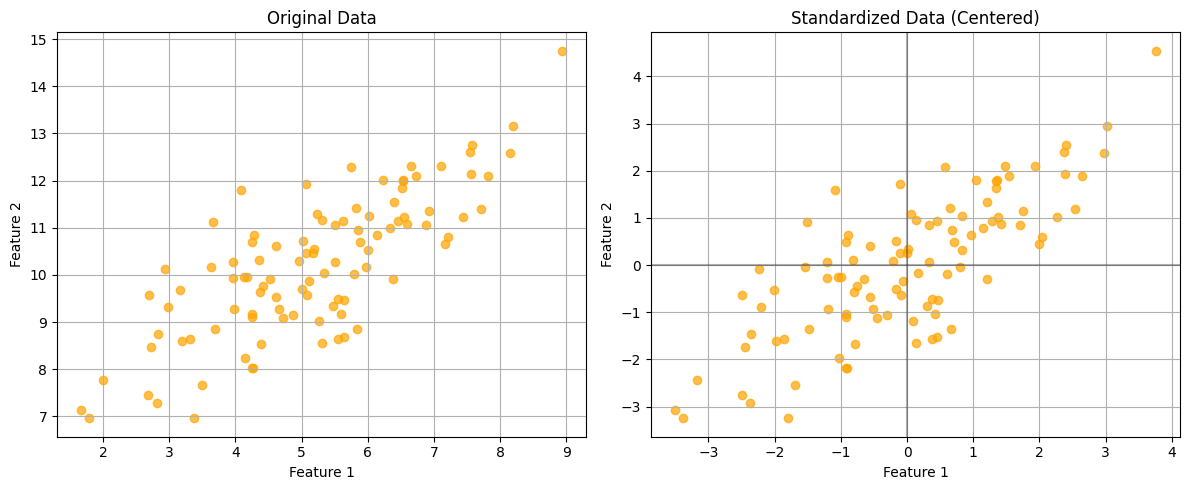

In [30]:
#-----
# 1.1. Data Visualization and Standardization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='orange')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)

# Calculate mean of original data
X_mean = X.mean(axis=0)

# Standardize the data (center by subtracting mean)
X_centered = X - X_mean

# Standardized data
axes[1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7, color='orange')
axes[1].set_title('Standardized Data (Centered)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].grid(True)

plt.tight_layout()
plt.show()


### **5.1.2. Compute the Covariance Matrix**

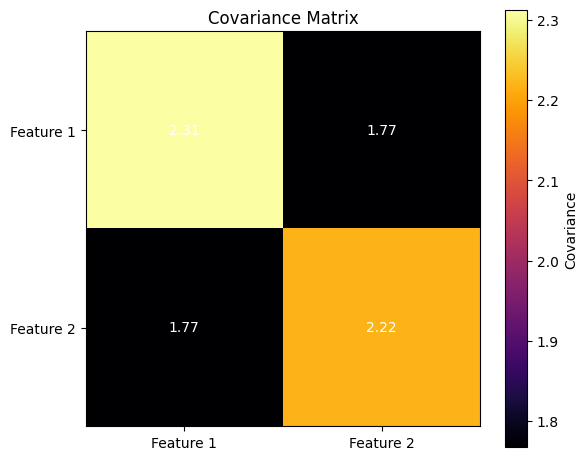

Covariance Matrix:
[[2.31177452 1.76706926]
 [1.76706926 2.22008242]]


In [21]:
#-----
# 1.2. Compute the Covariance Matrix
# Calculate covariance matrix
cov_matrix = np.cov(X_centered.T)

# Visualize covariance matrix as heatmap (without seaborn)
plt.figure(figsize=(6, 5))
plt.imshow(cov_matrix, cmap='inferno')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xticks([0, 1], ['Feature 1', 'Feature 2'])
plt.yticks([0, 1], ['Feature 1', 'Feature 2'])

# Add text annotations to show values
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{cov_matrix[i, j]:.2f}', 
                 ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

print("Covariance Matrix:")
print(cov_matrix)

### **5.1.3. Compute Eigenvalues and Eigenvectors**


Eigenvalues:
[4.03359236 0.49826458]

Eigenvectors (columns):
[[ 0.71621783 -0.6978768 ]
 [ 0.6978768   0.71621783]]


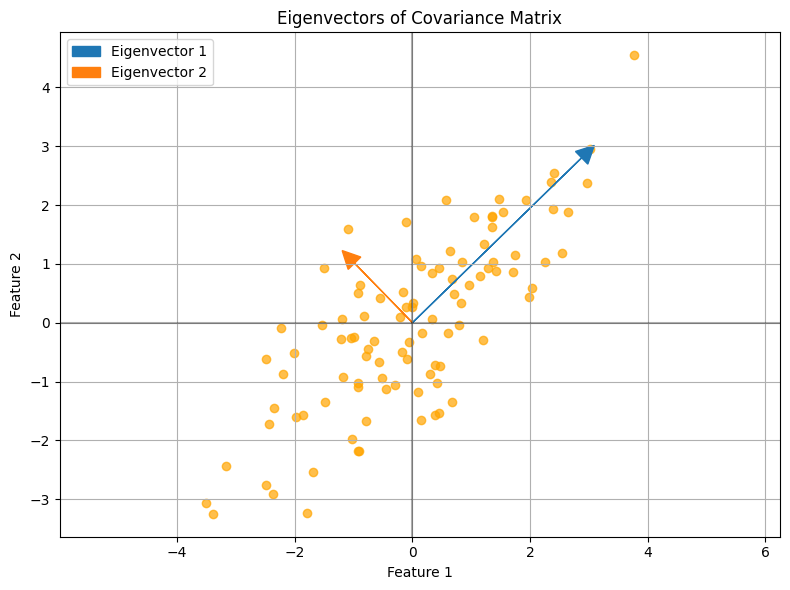

In [40]:
#-----
# 1.3. Compute Eigenvalues and Eigenvectors
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (columns):")
print(eigenvectors)

#-----
# Visualize eigenvectors on the standardized data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7, color='orange')

# Scale eigenvectors for visualization (multiply by eigenvalues for length proportional to variance)
scale_factor = 2
for i in range(2):
    plt.arrow(0, 0, 
              eigenvectors[0, i] * scale_factor * np.sqrt(eigenvalues[i]),
              eigenvectors[1, i] * scale_factor * np.sqrt(eigenvalues[i]),
              head_width=0.3, head_length=0.3, fc=f'C{i}', ec=f'C{i}', 
              label=f'Eigenvector {i+1}',  color='blue')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Eigenvectors of Covariance Matrix')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.axis('equal')  # Equal scaling for better visualization
plt.tight_layout()
plt.show()


### **5.1.4. Pick Top k Eigenvectors**

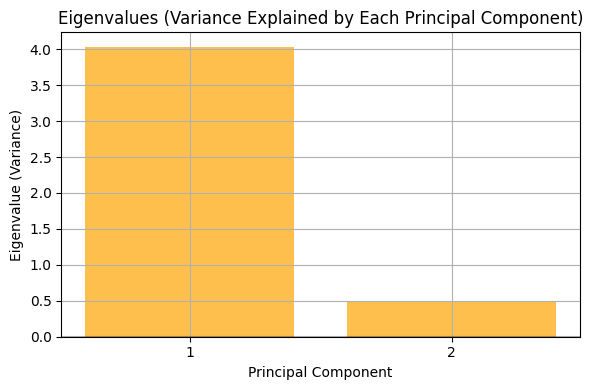


Explained Variance Ratio:
[0.89005289 0.10994711]


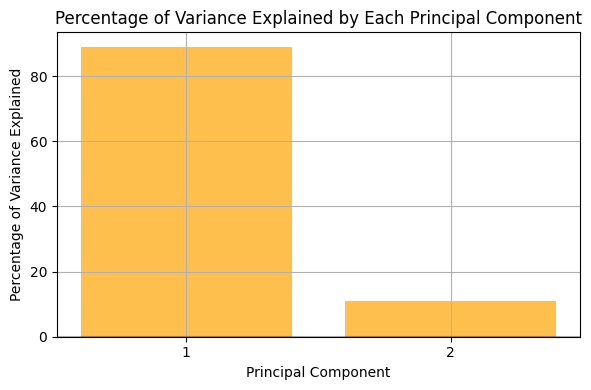

In [28]:
#-----
# 1.4. Pick Top k Eigenvectors (here k=1 for demonstration)
# Visualize variance explained by each principal component
plt.figure(figsize=(6, 4))
plt.bar([1, 2], eigenvalues, alpha=0.7, color='orange')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Eigenvalues (Variance Explained by Each Principal Component)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')
plt.xticks([1, 2])
plt.tight_layout()
plt.show()

#-----
# Calculate percentage of variance explained
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Visualize percentage of variance explained
plt.figure(figsize=(6, 4))
plt.bar([1, 2], explained_variance_ratio * 100, alpha=0.7, color='orange')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('Percentage of Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.xticks([1, 2])
plt.tight_layout()
plt.show()


### **5.1.5. Project the Data k Dimension**

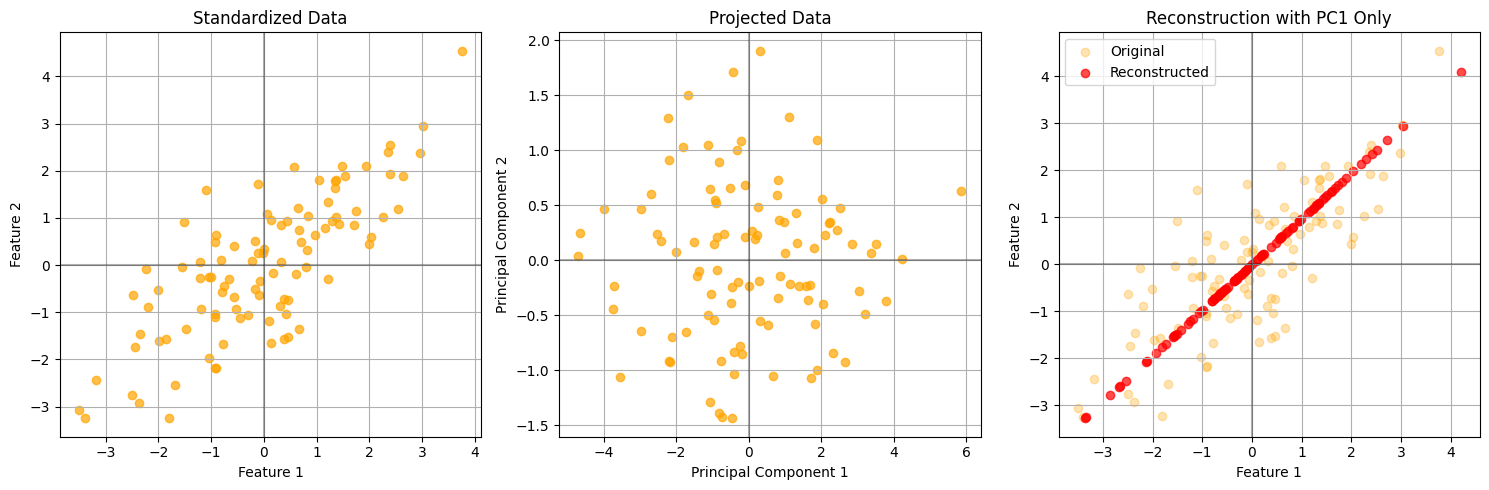

In [41]:
#-----
# 1.5. Project the Data onto k Dimensions
# Project data onto principal components
X_pca_manual = X_centered.dot(eigenvectors)

#-----
# Visualize projection and reconstruction
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original standardized data
axes[0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.7, color='orange')
axes[0].set_title('Standardized Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0].grid(True)

# Data projected onto principal components
axes[1].scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], alpha=0.7, color='orange')
axes[1].set_title('Projected Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].grid(True)

# Reconstruction using only the first principal component (k=1)
# Project onto first PC, then transform back to original space
X_pca_1d = X_pca_manual[:, 0].reshape(-1, 1)  # Keep only the first PC
X_reconstructed = X_pca_1d.dot(eigenvectors[:, 0].reshape(1, -1))  # Transform back to original space

# Plot the reconstructed data
axes[2].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.3, label='Original', color='orange')
axes[2].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.7, label='Reconstructed', color='red')
axes[2].set_title('Reconstruction with PC1 Only')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


## **5.3. Algebraic Definition of PCA**

Given a sample of $n$ observations on a vector of $d$ variables, let's denote the data matrix as $\mathbf{X}$, which is an $n \times d$ matrix where each row represents an observation and each column represents a variable. Let's assume the data has been centered (i.e., the mean of each variable is zero).

The first principal component, $z_1$, is a linear combination of the original $d$ variables:

$$z_1 = \mathbf{a}_1^T \mathbf{x} = a_{11}x_1 + a_{12}x_2 + \dots + a_{1d}x_d$$

where $\mathbf{x} = [x_1, x_2, \dots, x_d]^T$ is a $d \times 1$ vector representing a single observation, and $\mathbf{a}_1 = [a_{11}, a_{12}, \dots, a_{1d}]^T$ is a $d \times 1$ vector of weights or loadings for the first principal component.

The first principal component $\mathbf{z}_1$ for all $n$ observations can be represented as:

$$\mathbf{z}_1 = \mathbf{X} \mathbf{a}_1$$

The key property of the first principal component is that it captures the direction of the largest variance in the data. Mathematically, the weight vector $\mathbf{a}_1$ is chosen to maximize the variance of the projected data onto this direction, subject to the constraint that $\mathbf{a}_1$ is a unit vector (i.e., $||\mathbf{a}_1|| = \mathbf{a}_1^T \mathbf{a}_1 = 1$).

The variance of the first principal component is given by:

$$Var(z_1) = Var(\mathbf{a}_1^T \mathbf{x}) = \mathbf{a}_1^T \mathbf{S} \mathbf{a}_1$$

where $\mathbf{S}$ is the $d \times d$ covariance matrix of the original data $\mathbf{X}$ (or the correlation matrix if the data is standardized).

To find the weight vector $\mathbf{a}_1$ that maximizes this variance subject to the unit norm constraint, we solve the following optimization problem:

$$\max_{\mathbf{a}_1} \mathbf{a}_1^T \mathbf{S} \mathbf{a}_1 \quad \text{subject to} \quad \mathbf{a}_1^T \mathbf{a}_1 = 1$$

Using the method of Lagrange multipliers, it can be shown that the solution for $\mathbf{a}_1$ is the **eigenvector** corresponding to the **largest eigenvalue** of the covariance matrix $\mathbf{S}$. The maximum variance achieved is equal to this largest eigenvalue.

Therefore, the first principal component $z_1$ is the linear combination of the original variables whose coefficients are given by the eigenvector associated with the largest eigenvalue of the data's covariance matrix, and the resulting component has the maximum possible variance among all linear combinations with unit norm.

To find the $k$-th principal component $z_k$, we want to maximize its variance subject to the constraints that its loading vector $\mathbf{a}_k$ has a unit norm and is uncorrelated with the previous $k-1$ principal components.

The variance of the $k$-th principal component is given by:

$$Var(z_k) = \mathbf{a}_k^T \mathbf{S} \mathbf{a}_k$$

where $\mathbf{S}$ is the $d \times d$ covariance matrix of the centered original data. We want to maximize this subject to the following constraints:

1.  **Unit norm constraint:** $\mathbf{a}_k^T \mathbf{a}_k = 1$
2.  **Uncorrelation with previous principal components:** For $j = 1, 2, ..., k-1$, the covariance between $z_k$ and $z_j$ is zero, i.e., $Cov(z_k, z_j) = Cov(\mathbf{a}_k^T \mathbf{x}, \mathbf{a}_j^T \mathbf{x}) = \mathbf{a}_k^T \mathbf{S} \mathbf{a}_j = 0$. Since $\mathbf{a}_j$ are the eigenvectors of $\mathbf{S}$, this condition is equivalent to $\mathbf{a}_k$ being orthogonal to $\mathbf{a}_j$ for $j = 1, 2, ..., k-1$.

To solve this optimization problem using Lagrange multipliers, we define the Lagrangian function $L$:

$$L(\mathbf{a}_k, \lambda_k, \mu_1, \mu_2, ..., \mu_{k-1}) = \mathbf{a}_k^T \mathbf{S} \mathbf{a}_k - \lambda_k (\mathbf{a}_k^T \mathbf{a}_k - 1) - \sum_{j=1}^{k-1} \mu_j (\mathbf{a}_k^T \mathbf{S} \mathbf{a}_j)$$

where $\lambda_k$ and $\mu_j$ are Lagrange multipliers.

To find the maximum, we take the partial derivative of $L$ with respect to $\mathbf{a}_k$ and set it to zero:

$$\frac{\partial L}{\partial \mathbf{a}_k} = 2 \mathbf{S} \mathbf{a}_k - 2 \lambda_k \mathbf{a}_k - \sum_{j=1}^{k-1} \mu_j \mathbf{S} \mathbf{a}_j = \mathbf{0}$$

This gives us:

$$\mathbf{S} \mathbf{a}_k - \lambda_k \mathbf{a}_k - \frac{1}{2} \sum_{j=1}^{k-1} \mu_j \mathbf{S} \mathbf{a}_j = \mathbf{0}$$

We know that $\mathbf{S} \mathbf{a}_j = \lambda_j \mathbf{a}_j$, where $\lambda_j$ is the eigenvalue corresponding to the eigenvector $\mathbf{a}_j$. Substituting this into the equation:

$$\mathbf{S} \mathbf{a}_k - \lambda_k \mathbf{a}_k - \frac{1}{2} \sum_{j=1}^{k-1} \mu_j \lambda_j \mathbf{a}_j = \mathbf{0}$$

Multiplying by $\mathbf{a}_i^T$ (for $i < k$) on the left:

$$\mathbf{a}_i^T \mathbf{S} \mathbf{a}_k - \lambda_k \mathbf{a}_i^T \mathbf{a}_k - \frac{1}{2} \sum_{j=1}^{k-1} \mu_j \lambda_j \mathbf{a}_i^T \mathbf{a}_j = 0$$

Since $\mathbf{a}_k$ is orthogonal to $\mathbf{a}_i$ for $i < k$ ($\mathbf{a}_i^T \mathbf{a}_k = 0$) and $\mathbf{a}_i^T \mathbf{a}_j = 0$ for $i \neq j$ and $i, j < k$, and $\mathbf{a}_i^T \mathbf{S} \mathbf{a}_k = \lambda_k \mathbf{a}_i^T \mathbf{a}_k = 0$, the equation simplifies to:

$$0 - 0 - \frac{1}{2} \mu_i \lambda_i (1) = 0$$

This implies that $\mu_i \lambda_i = 0$ for all $i = 1, 2, ..., k-1$. If the eigenvalues $\lambda_i$ are distinct and non-zero, then $\mu_i = 0$ for all $i < k$.

Substituting $\mu_j = 0$ back into the equation for the partial derivative, we get:

$$\mathbf{S} \mathbf{a}_k - \lambda_k \mathbf{a}_k = \mathbf{0}$$

$$\mathbf{S} \mathbf{a}_k = \lambda_k \mathbf{a}_k$$

This shows that $\mathbf{a}_k$ must be an eigenvector of the covariance matrix $\mathbf{S}$ with eigenvalue $\lambda_k$. To maximize the variance $\mathbf{a}_k^T \mathbf{S} \mathbf{a}_k = \mathbf{a}_k^T (\lambda_k \mathbf{a}_k) = \lambda_k (\mathbf{a}_k^T \mathbf{a}_k) = \lambda_k$, we need to choose $\mathbf{a}_k$ to be the eigenvector corresponding to the $k$-th largest eigenvalue of $\mathbf{S}$.

Therefore, the $k$-th principal component $z_k = \mathbf{a}_k^T \mathbf{x}$, where $\mathbf{a}_k$ is the eigenvector associated with the $k$-th largest eigenvalue $\lambda_k$ of the covariance matrix $\mathbf{S}$. The Lagrange multiplier $\lambda_k$ itself represents the variance of the $k$-th principal component.

**Summary using Lagrange multipliers:**

To find the loadings $\mathbf{a}_k$ for the $k$-th principal component $z_k$, we solve the constrained optimization problem using Lagrange multipliers. The solution reveals that $\mathbf{a}_k$ must be an eigenvector of the covariance matrix $\mathbf{S}$, and to maximize the variance of $z_k$ while ensuring orthogonality with previous components, $\mathbf{a}_k$ is chosen as the eigenvector corresponding to the $k$-th largest eigenvalue $\lambda_k$ of $\mathbf{S}$. The Lagrange multiplier $\lambda_k$ corresponds to the variance of the $k$-th principal component.

## **5.4. How to choose k** 